<a href="https://www.kaggle.com/code/pratyushingale14/youtube-analysis?scriptVersionId=104544240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments=pd.read_csv(r"../input/youtube-comments/UScomments.csv",error_bad_lines= False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
comments.head(11)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


**SENTIMENT ANALYSIS**

In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
comments.dropna(inplace= True)

In [6]:
comments.head(40)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


****Sentiment Analysis

In [7]:
!pip install textblob 

In [8]:
from textblob import TextBlob as tb

In [9]:
tb("I love Logan and Jake so much and thay are so ...	").sentiment.polarity

0.35

In [10]:
dataframe= comments[0:1000]

In [11]:
polarity=[]
for comment in comments["comment_text"]:
    try:
        polarity.append(tb(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
polarity[0:11]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573, 0.0]

In [13]:
comments["polarity"]= polarity

In [14]:
comments.head(16)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


**WordCloud Representation**

In [15]:
positive_comments= comments[comments["polarity"]==1]

In [16]:
positive_comments.head(11)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
325,sjlHnJvXdQs,This is awesome. 1:20 XDDDDDDDDD,0,0,1.0
416,cMKX2tE5Luk,BEST MOVIE EVER!!!,0,0,1.0
433,cMKX2tE5Luk,Power is the disease. Care is the cure. Keep...,0,0,1.0
447,cMKX2tE5Luk,The greatest movie about the greatest movie.,0,0,1.0
469,cMKX2tE5Luk,It's Harry guys he's Spiderman best friend,0,0,1.0


In [17]:
negative_comments= comments[comments["polarity"]==-1]

In [18]:
negative_comments.head(11)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [19]:
!pip install wordcloud 

In [20]:
from wordcloud import WordCloud as wc, STOPWORDS 

In [21]:
positive_comments["comment_text"]

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [22]:
total_positive_comments= "  ".join(positive_comments["comment_text"])

In [23]:
total_positive_comments[0:100]

'yu are the best  Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as be'

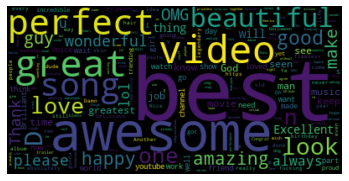

In [24]:
wordcloud=wc(stopwords= set(STOPWORDS), collocations = False, background_color = 'black').generate(total_positive_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [25]:
total_negative_comments=" ".join(negative_comments["comment_text"])

In [26]:
total_negative_comments[1:100]

"EN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

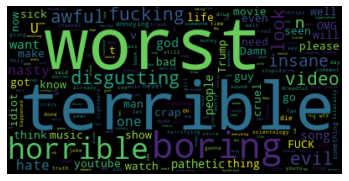

In [27]:
wordcloud= wc(stopwords=set(STOPWORDS),collocations = False, background_color="black").generate(total_negative_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**EMOJI ANALYSIS**

In [28]:
!pip install emoji

In [29]:
import emoji

In [30]:
comments.head(14)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [31]:
comment="The end though 😭👍🏻❤️"

In [32]:
comment

'The end though 😭👍🏻❤️'

In [33]:
[c for c in comment if c in emoji.distinct_emoji_list(c)]

['😭', '👍', '🏻', '❤']

In [34]:
emoji_list=[]
for comment in comments["comment_text"]:
    for char in comment:
        if char in emoji.distinct_emoji_list(char):
            emoji_list.append(char)
        
        
           

In [35]:
len(emoji_list)

294549

In [36]:
emoji_list[0:21]

['‼',
 '‼',
 '‼',
 '😉',
 '😭',
 '👍',
 '🏻',
 '❤',
 '😍',
 '💋',
 '💙',
 '👍',
 '👈',
 '😂',
 '🔥',
 '😂',
 '😂',
 '😂',
 '😂',
 '👻',
 '❤']

In [37]:
from collections import Counter

In [38]:
Counter(emoji_list[0:21])

Counter({'‼': 3,
         '😉': 1,
         '😭': 1,
         '👍': 2,
         '🏻': 1,
         '❤': 2,
         '😍': 1,
         '💋': 1,
         '💙': 1,
         '👈': 1,
         '😂': 5,
         '🔥': 1,
         '👻': 1})

In [39]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [40]:
emojis= [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [41]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [42]:
freq= [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [43]:
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [44]:
!pip install plotly

In [45]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [46]:
graph = go.Bar(x=emojis, y=freq)

In [47]:
iplot([graph])

**COLLECTING ENTIRE YOUTUBE DATA**

In [48]:
import os

In [49]:
path= r"../input/youtube-new"

In [50]:
files = os.listdir(path)

In [51]:
files

['GBvideos.csv',
 'MXvideos.csv',
 'KRvideos.csv',
 'MX_category_id.json',
 'GB_category_id.json',
 'US_category_id.json',
 'IN_category_id.json',
 'DEvideos.csv',
 'KR_category_id.json',
 'RU_category_id.json',
 'FRvideos.csv',
 'USvideos.csv',
 'INvideos.csv',
 'RUvideos.csv',
 'CA_category_id.json',
 'DE_category_id.json',
 'JP_category_id.json',
 'JPvideos.csv',
 'FR_category_id.json',
 'CAvideos.csv']

In [52]:
file1= files[0:3]

In [53]:
file1

['GBvideos.csv', 'MXvideos.csv', 'KRvideos.csv']

In [54]:
file2= files[7:8]
    
    
    

In [55]:
file2


['DEvideos.csv']

In [56]:
file3= files[10:14]

In [57]:
file3

['FRvideos.csv', 'USvideos.csv', 'INvideos.csv', 'RUvideos.csv']

In [58]:
file4= files[17:18]

In [59]:
file4

['JPvideos.csv']

In [60]:
file5=files[19:20]

In [61]:
file5

['CAvideos.csv']

In [62]:
file_csv=[*file1,*file2,*file3,*file4,*file5]


In [63]:
csv=(file_csv)
print(csv)

['GBvideos.csv', 'MXvideos.csv', 'KRvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'USvideos.csv', 'INvideos.csv', 'RUvideos.csv', 'JPvideos.csv', 'CAvideos.csv']


In [64]:
csv[0].split(".")[0][0:2]

'GB'

In [65]:
full_df=pd.DataFrame()
for file in csv:
    current_df=pd.read_csv(path +"/"+ file, encoding="iso-8859-1",error_bad_lines= False)
    current_df["country"]=file.split(".")[0][0:2]
    full_df= pd.concat([full_df, current_df])

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





In [66]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [67]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB


In [68]:
full_df["category_id"].unique()

array([26, 24, 10, 17, 25, 22, 23, 28, 15, 27,  1, 20,  2, 19, 29, 43, 44,
       30])

In [69]:
cat=pd.read_csv(r"../input/category-file/category_file.txt")

In [70]:
cat

,Category_id Category_name
0,1: Film & Animation
1,2: Autos & Vehicles
2,10: Music
3,15: Pets & Animals
4,17: Sports
5,18: Short Movies
6,19: Travel & Events
7,20: Gaming
8,21: Videoblogging
9,22: People & Blogs


In [71]:
cat.reset_index(inplace= True)

In [72]:
cat

,index,Category_id Category_name
0,0,1: Film & Animation
1,1,2: Autos & Vehicles
2,2,10: Music
3,3,15: Pets & Animals
4,4,17: Sports
5,5,18: Short Movies
6,6,19: Travel & Events
7,7,20: Gaming
8,8,21: Videoblogging
9,9,22: People & Blogs


In [73]:
cat.columns=("Category_id","Category_name")

In [74]:
cat.set_index("Category_id", inplace= True)

In [75]:
cat

,Category_name
Category_id,
0,1: Film & Animation
1,2: Autos & Vehicles
2,10: Music
3,15: Pets & Animals
4,17: Sports
5,18: Short Movies
6,19: Travel & Events
7,20: Gaming
8,21: Videoblogging


In [76]:
dct= cat.to_dict()

In [77]:
dct["Category_name"]

{0: '1: Film & Animation',
 1: ' 2: Autos & Vehicles',
 2: ' 10: Music',
 3: ' 15: Pets & Animals',
 4: ' 17: Sports',
 5: ' 18: Short Movies',
 6: ' 19: Travel & Events',
 7: ' 20: Gaming',
 8: ' 21: Videoblogging',
 9: ' 22: People & Blogs',
 10: ' 23: Comedy',
 11: ' 24: Entertainment',
 12: ' 25: News & Politics',
 13: ' 26: Howto & Style',
 14: ' 27: Education',
 15: ' 28: Science & Technology',
 16: ' 29: Nonprofits & Activism',
 17: ' 30: Movies',
 18: ' 31: Anime/Animation',
 19: ' 32: Action/Adventure',
 20: ' 33: Classics',
 21: ' 34: Comedy',
 22: ' 35: Documentary',
 23: ' 36: Drama',
 24: ' 37: Family',
 25: ' 38: Foreign',
 26: ' 39: Horror',
 27: ' 40: Sci-Fi/Fantasy',
 28: ' 41: Thriller',
 29: ' 42: Shorts',
 30: ' 43: Shows',
 31: ' 44: Trailers            '}

In [78]:
full_df["Category_name"]=full_df["category_id"].map(dct["Category_name"])

In [79]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [80]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Category_name
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,39: Horror
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,37: Family
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,23: Comedy
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,30: Movies


(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

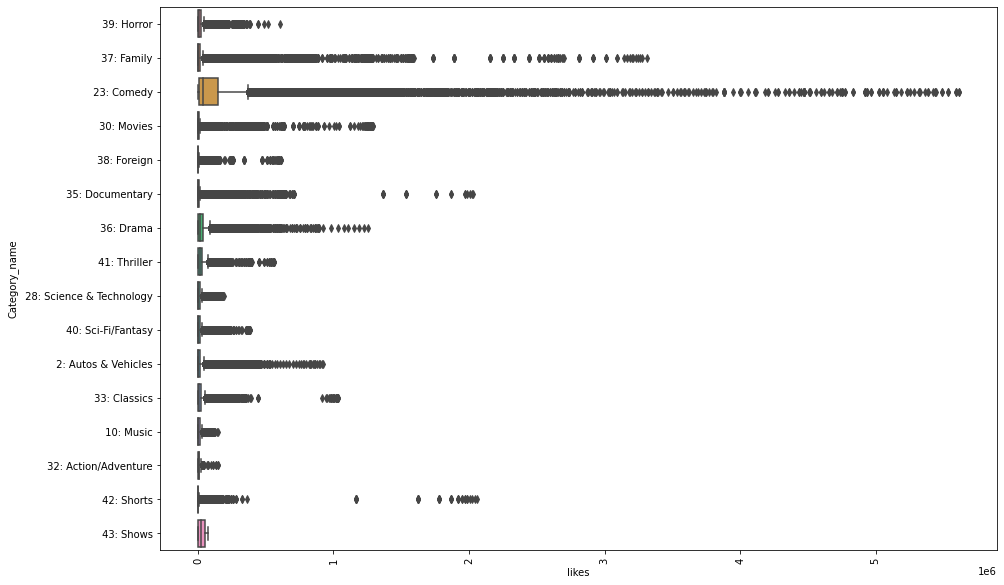

In [81]:
plt.figure(figsize=(15,10))
sns.boxplot(x="likes", y="Category_name", data= full_df)
plt.xticks(rotation="vertical")


**AUDIANCE ENGAGEMENT ANALYSIS**

In [82]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [83]:
full_df["like_rate"]=(full_df["likes"]/full_df["views"])*100
full_df["dislike_rate"]=(full_df["dislikes"]/full_df["views"])*100
full_df["comment_count_rate"]=(full_df["comment_count"]/full_df["views"])*100




In [84]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Category_name,like_rate,dislike_rate,comment_count_rate
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,39: Horror,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,37: Family,2.425989,0.217723,0.261666
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,23: Comedy,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,30: Movies,0.693421,0.043114,0.132936


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' 39: Horror'),
  Text(1, 0, ' 37: Family'),
  Text(2, 0, ' 23: Comedy'),
  Text(3, 0, ' 30: Movies'),
  Text(4, 0, ' 38: Foreign'),
  Text(5, 0, ' 35: Documentary'),
  Text(6, 0, ' 36: Drama'),
  Text(7, 0, ' 41: Thriller'),
  Text(8, 0, ' 28: Science & Technology'),
  Text(9, 0, ' 40: Sci-Fi/Fantasy'),
  Text(10, 0, ' 2: Autos & Vehicles'),
  Text(11, 0, ' 33: Classics'),
  Text(12, 0, ' 10: Music'),
  Text(13, 0, ' 32: Action/Adventure'),
  Text(14, 0, ' 42: Shorts'),
  Text(15, 0, ' 43: Shows')])

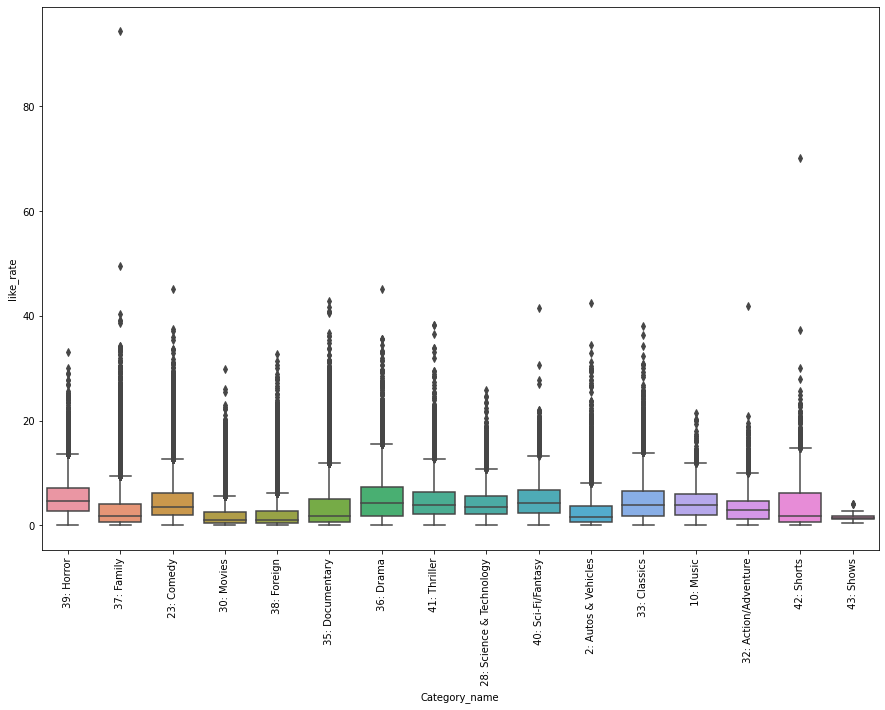

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Category_name",y="like_rate", data=full_df)
plt.xticks(rotation="vertical")


<AxesSubplot:xlabel='views', ylabel='likes'>

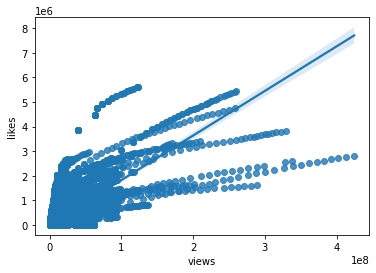

In [86]:
sns.regplot(data= full_df, x="views", y="likes")

In [87]:
full_df[["likes","dislikes","views"]].corr()

,likes,dislikes,views
likes,1.000000,0.453710,0.777796
dislikes,0.453710,1.000000,0.421653
views,0.777796,0.421653,1.000000


<AxesSubplot:>

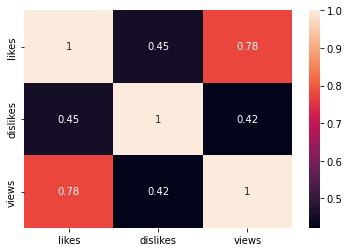

In [88]:
sns.heatmap(full_df[["likes","dislikes","views"]].corr(), annot= True)

**ANALYZING TRENDING VIDEOS**

In [89]:
ppp=full_df.groupby("channel_title")["video_id"].count().sort_values(ascending= False).to_frame().reset_index().rename(columns={"video_id":"total_videos"})

In [90]:
ppp

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [91]:
import plotly.express as px


In [92]:
px.bar(data_frame=ppp[0:10],x="channel_title", y="total_videos")

**Punctuations impact on views, likes, dislikes**

In [93]:
import string

In [94]:
def punc_count(x):
      return len([c for c in x if c in string.punctuation])

In [95]:
full_df["title"]

0            John Lewis Christmas Ad 2017 - #MozTheMonster
1              Taylor Swift: â¦Ready for It? (Live) - SNL
2              Eminem - Walk On Water (Audio) ft. BeyoncÃ©
3        Goals from Salford City vs Class of 92 and Fri...
4        Dashcam captures truck's near miss with child ...
                               ...                        
40876                         HOW2: How to Solve a Mystery
40877                     Eli Lik Lik Episode 13 Partie 01
40878    KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...
40879                     Trump Advisor Grovels To Trudeau
40880    ãå®æ´çãéå°æææ
äººè©²æéº¼è¾¦ï...
Name: title, Length: 375942, dtype: object

In [96]:
text=" Taylor Swift: â¦Ready for It? (Live) - SNL"

In [97]:
punc_count(text)

5

In [98]:
sample_data= full_df[0:100]

In [99]:
sample_data["count_punc"]=sample_data["title"].apply(punc_count)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
sample_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,False,False,False,Click here to continue the story and make your...,GB,39: Horror,0.770723,0.141837,0.131206,2
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,...,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,GB,37: Family,2.425989,0.217723,0.261666,5
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,GB,23: Comedy,4.589075,0.253051,0.733639,4
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,...,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,30: Movies,0.693421,0.043114,0.132936,1
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,...,False,False,False,Dashcam captures truck's near miss with child ...,GB,38: Foreign,0.305655,0.020377,0.305655,1


In [101]:
import plotly.express as px
px.bar(data_frame= sample_data, x="count_punc", y="views")
#plt.figure(figsize=(12,10))
#sns.boxplot(x="count_punc", y="views", data= sample_data)

In [102]:
sample_data["count_punc"].corr(sample_data["views"])

0.12540822614295588

In [103]:
cat

,Category_name
Category_id,
0,1: Film & Animation
1,2: Autos & Vehicles
2,10: Music
3,15: Pets & Animals
4,17: Sports
5,18: Short Movies
6,19: Travel & Events
7,20: Gaming
8,21: Videoblogging
